# Supervised Learning with scikit-learn


## Classification

### Load iris data from scikit-learn


In [148]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

iris = datasets.load_iris()
type(iris)

sklearn.utils.Bunch

In [61]:
print('iris keys: {}'.format(iris.keys()))
print('\ndata shape: {}, target shape: {}'.format(iris.data.shape, iris.target.shape))
print('\nfeature names: {}, target name: {}'.format(iris.feature_names, iris.target_names))

iris keys: dict_keys(['data', 'DESCR', 'target', 'feature_names', 'target_names'])

data shape: (150, 4), target shape: (150,)

feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'], target name: ['setosa' 'versicolor' 'virginica']


In [11]:
X = iris.data
y = iris.target

df = pd.DataFrame(X, columns=iris.feature_names)
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


/Users/araks/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  from ipykernel import kernelapp as app


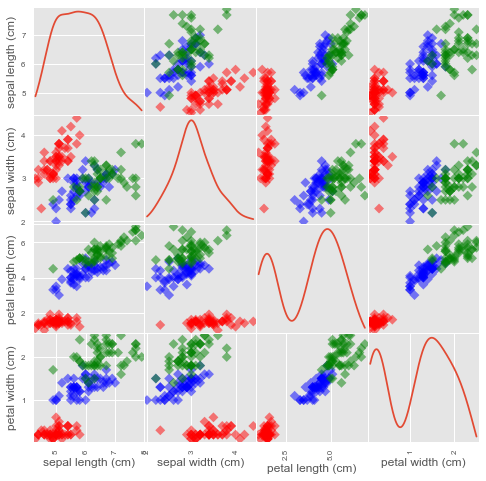

In [58]:
_ = pd.scatter_matrix(df, c=pd.Series(y).map({0:'red', 1:'blue', 2:'green'}), 
                  figsize=(8,8), marker='D', diagonal='kde')

### k-Nearest Neighbors Classifier

In [104]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

#### Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=123, stratify=y)

#### Instantiate k-nearest neighbors clasifier  
knn = KNeighborsClassifier(n_neighbors=6)
print('knn: {}'.format(knn))

#### Fit the classifier to the training data
knn.fit(X_train, y_train)

#### Make a prediction on the test data
y_pred = knn.predict(X_test)
print('\ny_pred: {}'.format(y_pred))

#### Measure the performance (accuracy)
accuracy = knn.score(X_test, y_test)
print('\naccuracy on test data: {}'.format(accuracy))

#### Predict on unseen data
unseen_pred = knn.predict(np.array([3.4,0.3,0.2,1]).reshape(1,4))
print('\nThe predicted label for an unseen data point [3.4,0.3,0.2,1]: {}'.format(unseen_pred))

knn: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

y_pred: [2 2 1 1 2 0 0 1 0 0 2 0 2 0 1 0 2 2 0 0 0 0 0 1 0 1 2 0 1 2 2 2 1 1 1 1 2
 2 2 0 2 1 1 2 1]

accuracy on test data: 0.9333333333333333

The predicted label for an unseen data point [3.4,0.3,0.2,1]: [0]


#### Plot train vs test accuracy

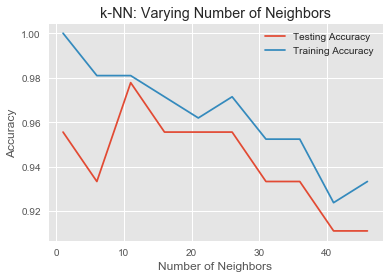

In [119]:
neighbors = np.arange(1, 50, 5)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)


plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

## Regression

### Load boston data from scikit-learn

In [125]:
from sklearn import datasets

boston = datasets.load_boston()
print('boston keys: {}'.format(boston.keys()))
print('\ndata shape: {}, target shape: {}'.format(boston.data.shape, boston.target.shape))
print('\nfeature names: {}'.format(boston.feature_names))

boston keys: dict_keys(['data', 'DESCR', 'target', 'feature_names'])

data shape: (506, 13), target shape: (506,)

feature names: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [135]:
X = boston.data
y = boston.target

df = pd.DataFrame(X, columns=boston.feature_names)
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


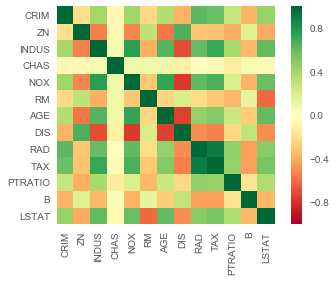

In [136]:
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

### Linear Regression

In [145]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

#### Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=64)

#### Instantiate linear regression 
reg_all = linear_model.LinearRegression()
print('linear regression: {}'.format(reg_all))

#### Fit the model to the training data
reg_all.fit(X_train, y_train)

#### Make a prediction on the test data
y_pred = reg_all.predict(X_test)
#print('\ny_pred: {}'.format(y_pred))

#### Measure the performance (r-squared)
print('\nR^2: {}'.format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): {}".format(rmse))

linear regression: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

R^2: 0.7077341955746003
Root Mean Squared Error (RMSE): 5.072411157270732


### Cross-validation

In [151]:
from sklearn.model_selection import cross_val_score

### instantiate the regressor
reg = linear_model.LinearRegression()

### call cross_val_score
cv_results = cross_val_score(reg, X, y, cv=5) ## score reported is R^2
print(cv_results)
print(np.mean(cv_results))

[ 0.63861069  0.71334432  0.58645134  0.07842495 -0.26312455]
0.350741350933


## Regularized Regress